# Multi-Class Text Classification

![alt text](https://miro.medium.com/max/966/0*X7PVc7QwrpFnyo4p.png)


In this project, we will create a model to predict the label of class, given the `text`. In the following post, we will walk through series of steps on how to get started with building model using [Google Colab](https://colab.research.google.com/). We will go through detail process on each step on how to approach to classfication problem. 


### Structure of project

1. Introduction
    - Classification

2. Data Understanding
    - Load data
    - Check for null and missing values
    - Check for duplicated rows
    - Label Encoding
3. Data Preperation
    - Lowercase
    - Stopwords
    - Tokenization 
    - Lemmentation
4. Model Preperation 
    - Define the model 
    - Set the optimizer 
5. Model Evaluation 
    - Hyperparameter tuning
6. Prediction and submission
    - Export model 
    - Import model


## Getting started

For this problem, we are given two CSV files, `train_set.csv` and `test_set.csv`. We are going to use the training file to train and test the model, and we then use the model to predict the unknown values in the text file. The first steps are to read in the files and perform some preliminary analysis to determine what pre-processing we will need before attempting to train a model.


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# installing libraries requiered for this project

# imblear for smote algorithm: balancing dataset
!pip install imblearn

# installing autotime
!pip install ipython-autotime

# installing word segment
!pip install wordsegment 

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=6b8796a0893234209996cbedd799465460db47aef0f6f619d15fb6879ed183c0
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime
     |████████████████████████████████| 4.8MB 14.9MB/s 


## Import libraries

Let's now import the required libraries and load the dataset into our application. The following script imports the required libraries:

In [3]:
import re
import string
from string import punctuation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# importing for wordcloud
import collections 
from wordcloud import WordCloud

# importing for text processing 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from textblob import TextBlob
from textblob import Word
from wordsegment import load, segment 
load()

# 
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


# sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# keras
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,Flatten,LSTM, SpatialDropout1D,Activation
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Conv1D, GlobalMaxPooling1D,Dropout

# pickle
import pickle

# 
np.random.seed(500)

# 
%load_ext autotime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
# setting properties of datafrme 

# column display size
pd.set_option("display.max_colwidth", 300)

# warrning option
pd.set_option('mode.chained_assignment', None)

time: 1.21 ms


## Data Understanding

There are 12 output labels for each text: . A text can belong to all of these categories ,which makes it a multi-label classification problem.

We will use both "train_set.csv" and "test_set.csv" file that contains 23615 and 5894 records respectively.

### 2.1 Load data 

Now lets load data into the memory.


In [7]:
# load the data
train = pd.read_csv('train_set.csv',  encoding='latin-1')
test = pd.read_csv('test_set.csv',  encoding='latin-1')
print(train.shape)
train.head()

(23615, 2)


,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for circuit breaker captive consumption
2,85389000,lv ma pd trip unit for cvs parts of circuit breakers
3,85389000,lv na p trip unit for cvs switch parts of circuit breaker
4,85389000,lv tmd pd trip unit for cvs parts of circuitbreakers


time: 64.3 ms


The dataset contains 23615 records and 2 columns. The header of the dataset is up above.

Once the files have been imported we will try to understand more about data and get some more information about the dataset.

In [8]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("Duplicated rows:")
    duplicate_rows = train[train.duplicated()]
    print("Duplicated rows: " ,len(duplicate_rows))

describe_data(train)

Data Types:
label     int64
text     object
dtype: object
Rows and Columns:
(23615, 2)
Column Names:
Index(['label', 'text'], dtype='object')
Null Values:
label    0.0
text     0.0
dtype: float64
Duplicated rows:
Duplicated rows:  12243
time: 28.9 ms


This gives the following information about the data set;
- That we have text column as non numeric which will need some pre-processing before they can be used to build a model.
- That we have a relatively small data set consisting of 11372 rows and 2 columns.
- That there are no null values present in the data
- Thata there are 12243 duplicated rows which has to be removed.

85389000    2936
85177090    2581
85369090    2438
39269099    2189
73181500    2033
85366990    1944
85238090    1720
85364900    1714
87089900    1673
33041000    1605
87082900    1451
84713010    1331
Name: label, dtype: int64

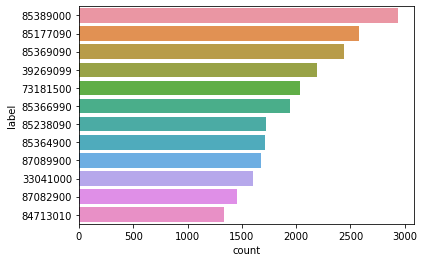

time: 203 ms


In [9]:
# plot the frequency of each class
sns.countplot(y = 'label',
              data = train,
              order = train['label'].value_counts().index)

# occurence of each class
train['label'].value_counts()

There are 12 distinct classes and all classes don't have balanced distribution of data. We can see class `85389000` (2936 rows) have more dataset that class `84713010`(1331 rows). 

If we train classifier on this data, the accuracy of the classifier would be maximum for class `85389000` (top row) and for class (below row) the model treats it as minority class. So, we need to balance our data. 

To balance imbalanced dataset there are multiple approaches we has been discussed below.


In [10]:
# replacing labels with new encoded labels
# The labels are replaced from number 1 to 12 
# such that 1 has highest number of distribution i.e 2926
# and 12 has the lowest number of distribution i.e. 1331


replace_values = {85389000 : 1, 85177090 : 2, 85369090 : 3, 39269099 : 4,
                  73181500 : 5, 85366990 : 6, 85238090 : 7, 85364900 : 8, 87089900 : 9,
                  33041000 : 10 ,87082900 : 11 , 84713010 : 12 }   

train = train.replace({"label": replace_values})                                                                                             

# occurence of each class
train['label'].value_counts()

1     2936
2     2581
3     2438
4     2189
5     2033
6     1944
7     1720
8     1714
9     1673
10    1605
11    1451
12    1331
Name: label, dtype: int64

time: 12.7 ms


1     2936
2     2581
3     2438
4     2189
5     2033
6     1944
7     1720
8     1714
9     1673
10    1605
11    1451
12    1331
Name: label, dtype: int64

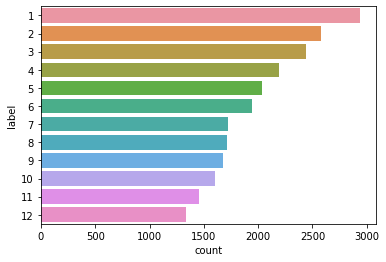

time: 165 ms


In [11]:
# plot the frequency of each class
sns.countplot(y = 'label',
              data = train,
              order = train['label'].value_counts().index)

# occurence of each class
train['label'].value_counts()

Each class has been label to corresponding values from 1 to 12. This makes it easier to read each class. 